### TASK: To Write a Python program to calculate the final account balance for each customer, flag suspicious activities, track total deposits and withdrawals, display transaction history, calculate overdraft charges, and identify the top 3 customers with the most overdrawn days.

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict

In [47]:
df = pd.read_csv("current_account_details.csv")
df.head()

,transaction_id,customer_id,transaction_type,amount,transaction_date,initial_balance,transaction_fee,overdraft_limit
0,T001,C001,deposit,5000,01/10/2025,1000,0,500
1,T002,C002,withdrawal,1500,01/11/2025,3000,20,500
2,T003,C003,deposit,3000,01/12/2025,2000,0,300
3,T004,C001,withdrawal,2000,1/14/2025,1000,25,500
4,T005,C004,deposit,7000,1/16/2025,3000,0,700


In [48]:
df.isnull().sum()

transaction_id      0
customer_id         0
transaction_type    0
amount              0
transaction_date    0
initial_balance     0
transaction_fee     0
overdraft_limit     0
dtype: int64

In [49]:
df.dtypes

transaction_id      object
customer_id         object
transaction_type    object
amount               int64
transaction_date    object
initial_balance      int64
transaction_fee      int64
overdraft_limit      int64
dtype: object

In [50]:
df["transaction_date"] = pd.to_datetime(df["transaction_date"], format="%m/%d/%Y")

customer_balances = {}
overdrawn_days = defaultdict(int)
total_deposits = defaultdict(float)
total_withdrawals = defaultdict(float)
suspicious_activities = []
overdraft_fees = defaultdict(float)

for i, row in df.iterrows():
    cust_id = row["customer_id"]
    if cust_id not in customer_balances:
        customer_balances[cust_id] = row["initial_balance"]
    
    if row["transaction_type"] == "deposit":
        customer_balances[cust_id] += row["amount"]
        total_deposits[cust_id] += row["amount"]
    else:  
        new_balance = customer_balances[cust_id] - row["amount"] - row["transaction_fee"]
        customer_balances[cust_id] = new_balance
        total_withdrawals[cust_id] += row["amount"]
        overdraft_fees[cust_id] += row["transaction_fee"]
        
        if new_balance < 0:
            if abs(new_balance) > row["overdraft_limit"]:
                suspicious_activities.append((cust_id, row["transaction_id"], row["transaction_date"], new_balance))
            overdrawn_days[cust_id] += 1

top_overdrawn_customers = sorted(overdrawn_days.items(), key=lambda x: x[1], reverse=True)[:3]


#### Saving

In [51]:

with open("report.txt", "w") as file:
    file.write("------------- Final Account Balances -------------\n")
    for cust, balance in customer_balances.items():
        file.write(f"Customer {cust}: ${balance:.2f}\n")
    
    file.write("\n------------- Total Deposits -------------\n")
    for cust, amount in total_deposits.items():
        file.write(f"Customer {cust}: ${amount:.2f}\n")
    
    file.write("\n------------- Total Withdrawals -------------\n")
    for cust, amount in total_withdrawals.items():
        file.write(f"Customer {cust}: ${amount:.2f}\n")
    
    file.write("\n------------- Overdraft Charges -------------\n")
    for cust, fees in overdraft_fees.items():
        file.write(f"Customer {cust}: ${fees:.2f}\n")
    
    file.write("\n------------- Top 3 Customers with Most Overdrawn Days -------------\n")
    for cust, days in top_overdrawn_customers:
        file.write(f"Customer {cust}: {days} days \n")
    
    file.write("\n------------- Suspicious Activities -------------\n")
    for entry in suspicious_activities:
        file.write(f"Customer {entry[0]} - Transaction {entry[1]} on {entry[2].strftime('%m/%d/%Y')} with Balance ${entry[3]:.2f}\n")

#### Charts

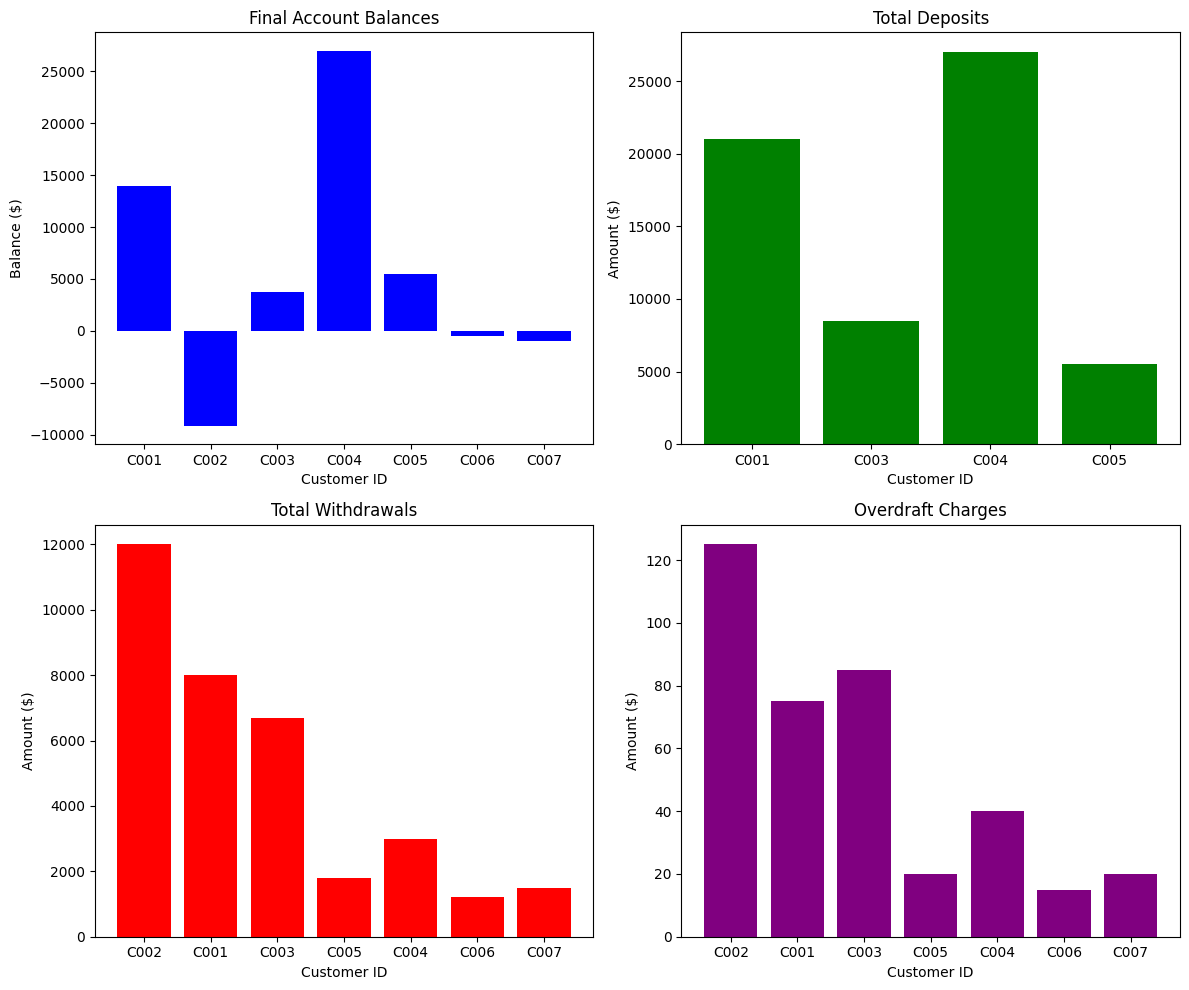

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10)) 

axes[0, 0].bar(customer_balances.keys(), customer_balances.values(), color='blue')
axes[0, 0].set_title("Final Account Balances")
axes[0, 0].set_ylabel("Balance ($)")
axes[0, 0].set_xlabel("Customer ID")

axes[0, 1].bar(total_deposits.keys(), total_deposits.values(), color='green')
axes[0, 1].set_title("Total Deposits")
axes[0, 1].set_ylabel("Amount ($)")
axes[0, 1].set_xlabel("Customer ID")

axes[1, 0].bar(total_withdrawals.keys(), total_withdrawals.values(), color='red')
axes[1, 0].set_title("Total Withdrawals")
axes[1, 0].set_ylabel("Amount ($)")
axes[1, 0].set_xlabel("Customer ID")

axes[1, 1].bar(overdraft_fees.keys(), overdraft_fees.values(), color='purple')
axes[1, 1].set_title("Overdraft Charges")
axes[1, 1].set_ylabel("Amount ($)")
axes[1, 1].set_xlabel("Customer ID")

plt.tight_layout()
plt.show()
